The Riemann sum of the Ito integral is  -1.4012074166637658
The theoretical Ito integral is  -1.4552001233665013
The Riemann sum of the Stratonovich integral is  0.044799876633496535
The theoretical Stratonovich integral is  0.04479987663349878


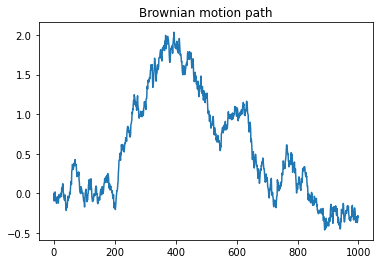

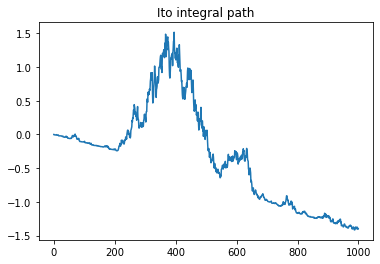

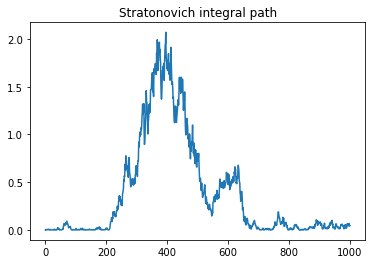

In [50]:
import numpy as np
import matplotlib.pyplot as plt

T = 3 # terminal time
N = 1000 # numer of time steps
dt = T / N # length of one period

W = np.zeros(N)
S = np.zeros(N)
S[0] = S_0


dW = np.random.normal(0, np.sqrt(dt), N) # Brownian motion differentials

for i in range(N-1):
    W[i+1] = W[i] + dW[i]

Ito_integral = np.zeros(N)
Strat_integral = np.zeros(N)

for i in range(N-1):
    Ito_integral[i+1] = Ito_integral[i] + W[i]*dW[i]
    Strat_integral[i+1] = Strat_integral[i] + 1/2*(W[i]+W[i+1])*dW[i]
    
p1 = plt.figure(1)
plt.plot(W)
plt.title('Brownian motion path')

p2 = plt.figure(2)
plt.plot(Ito_integral)
plt.title('Ito integral path')

p3 = plt.figure(3)
plt.plot(Strat_integral)
plt.title('Stratonovich integral path')

print("The Riemann sum of the Ito integral is ", Ito_integral[N-1])
print("The theoretical Ito integral is ", (W[N-1]**2 - T)/2)
print("The Riemann sum of the Stratonovich integral is ", Strat_integral[N-1])
print("The theoretical Stratonovich integral is ", W[N-1]**2 /2)

In [62]:
n = 1000 # number of simulations

first_moment = 0
second_moment = 0

for i in range(n):
    dW = np.random.normal(0, np.sqrt(dt), N) # Brownian motion differentials
    for j in range(N-1):
        W[j+1] = W[j] + dW[j]
        Ito_integral[j+1] = Ito_integral[j] + W[j]*dW[j]
    first_moment += Ito_integral[N-1]
    second_moment += Ito_integral[N-1]**2
    
second_moment_integral = 0    
x = np.linspace(0, T, num = N)
for i  in range(N-1):
    second_moment_integral += x[i]*(x[i+1]-x[i])
    
    
print("The expectation of the Ito integral is ", first_moment/n)
print("The Monte Carlo second moment of the Ito integral is ", second_moment/n)
print("The theoretical second moment of the Ito integral is ", second_moment_integral)
    
    

    

The expectation of the Ito integral is  0.07571961922865328
The Monte Carlo second moment of the Ito integral is  4.820193590354581
The theoretical second moment of the Ito integral is  4.495495495495496
